In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import numpy as np
import tensorflow as tf
import requests
from PIL import Image
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Let's start by including the code that gets the data and model:

In [2]:
!wget -Nq https://raw.githubusercontent.com/MicrosoftDocs/tensorflow-learning-path/main/intro-tf/tintro.py
from tintro import *

In order to make a prediction, we need to pass some data to the model, and do a single forward pass through the network to get the prediction. If the code below is unclear to you, make sure you go back to module 1, where we explain it in detail. Remember that, unlike during testing, we don't need to call the loss function because we're no longer interested in evaluating how well the model is doing. Instead, we call `softmax` to convert the values of the output vector into values between 0 and 1, and then get the `argmax` of that vector to get the predicted label index.

Similarly to the training and testing sections, once we're done with debugging, we can add a `@tf.function` decorator to get the performance benefits of graph execution.

In [3]:
@tf.function
def predict(model: tf.keras.Model, X: np.ndarray) -> tf.Tensor:
  y_prime = model(X, training=False)
  probabilities = tf.nn.softmax(y_prime, axis=1)
  predicted_indices = tf.math.argmax(input=probabilities, axis=1)
  return predicted_indices

We can now make a prediction. First we'll get the image we'll use for prediction.

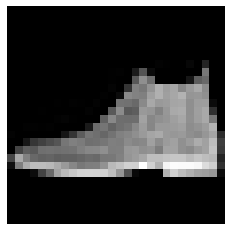

In [4]:
model = NeuralNetwork()
model.load_weights('outputs/weights')

url = 'https://raw.githubusercontent.com/MicrosoftDocs/tensorflow-learning-path/main/intro-keras/predict-image.png'

with Image.open(requests.get(url, stream=True).raw) as image:
  X = np.asarray(image, dtype=np.float32).reshape((-1, 28, 28)) / 255.0

plt.figure()
plt.axis('off')
plt.imshow(X.squeeze(), cmap='gray')
plt.show()

We're now ready to make the prediction by passing the image we read into the `predict` function.

In [5]:
predicted_index = predict(model, X).numpy()[0]
predicted_name = labels_map[predicted_index]

print(f'Predicted class: {predicted_name}')

Predicted class: Ankle Boot
